In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
bar_data_df = pd.read_csv('C:/Users/lenovo/Desktop/test/IF_bar_data.csv')
bar_data_df_if = bar_data_df.loc[(bar_data_df['symbol'] == 'IF888') & (bar_data_df['interval'] == '1m')]
bar_data_df.to_csv('E:/IF888.csv',index=False) 

In [25]:
class DataAnalysis:
    '''读取数据 合成K线'''

    def __init__(self,one_minute_df):

        self.one_minute_data= one_minute_df
        self.one_minute_data.set_index(pd.to_datetime(self.one_minute_data['datetime']),inplace=True)
        
    def generate_n_period_data(self,interval:str):
        '''分钟：nT 天：nD'''
        data = pd.DataFrame()
        data['open'] = self.one_minute_data['open'].resample(interval,label='right').first()
        data['high'] = self.one_minute_data['high'].resample(interval,label='right').max()
        data['low'] = self.one_minute_data['low'].resample(interval,label='right').min()
        data['close'] = self.one_minute_data['close'].resample(interval,label='right').last()
        data['volume'] = self.one_minute_data['volume'].resample(interval,label='right').sum()
        data['open_interest'] = self.one_minute_data['close'].resample(interval,label='right').last()
        return data

In [11]:
def getLLT(price_array:np.array, alpha:float):
    LLT_list = []
    LLT_list.append(price_array[0])
    LLT_list.append(price_array[1])
    for t in range(2,price_array.shape[0]):
        value = (alpha-alpha**2/4)*price_array[t]+(alpha**2/2)*price_array[t-1]-(alpha-3*(alpha**2)/4)*price_array[t-2]+2*(1-alpha)*LLT_list[t-1]-(1-alpha)**2*LLT_list[t-2]
        LLT_list.append(value)
    return LLT_list

    

In [26]:
bar_generator = DataAnalysis(bar_data_df)

In [34]:
minute_bar


,open,high,low,close,volume,open_interest
datetime,,,,,,
2010-01-31,4290.0,4707.000,4022.0,4357.0,7.924745e+07,4357.0
2011-04-30,4084.0,5230.000,1684.2,2207.4,1.903874e+09,2207.4
2012-07-31,2173.4,5004.000,1181.8,1258.8,1.080113e+09,1258.8
2013-10-31,1209.8,4240.644,769.8,1219.8,3.734798e+09,1219.8
2015-01-31,1172.8,3806.648,837.8,1428.0,4.557718e+09,1428.0
2016-04-30,2024.2,5396.800,117.0,1429.0,7.272068e+09,1429.0
2017-07-31,2545.6,3748.000,453.0,2860.7,2.708142e+10,2860.7
2018-10-31,2844.1,20093.000,2317.0,6307.0,1.728255e+12,6307.0
2020-01-31,6311.5,13920.000,2857.0,9321.0,1.168409e+12,9321.0


In [31]:
minute_bar=bar_generator.generate_n_period_data('15M')

In [37]:
price_array = minute_bar['close'].values
LLT_1 = getLLT(price_array,0.03)
LLT_2 = getLLT(price_array,0.04)
LLT_3 = getLLT(price_array,0.05)

In [40]:
combine_df = pd.DataFrame({'close_price':price_array,'LLT_1':LLT_1,'LLT_2':LLT_2,'LLT_3':LLT_3},index = minute_bar.index)


In [42]:
combine_df

,close_price,LLT_1,LLT_2,LLT_3
datetime,,,,
2010-01-31,4357.0,4357.000000,4357.000000,4357.000000
2011-04-30,2207.4,2207.400000,2207.400000,2207.400000
2012-07-31,1258.8,93.559775,105.359600,117.099375
2013-10-31,1219.8,-1923.282697,-1868.385408,-1814.119687
2015-01-31,1428.0,-3813.045524,-3675.716191,-3541.057092
2016-04-30,1429.0,-5580.271186,-5325.068534,-5077.126457
2017-07-31,2860.7,-7194.087276,-6777.571024,-6376.425430
2018-10-31,6307.0,-8558.879341,-7908.752645,-7286.888315
2020-01-31,9321.0,-9638.828307,-8675.433583,-7759.926911


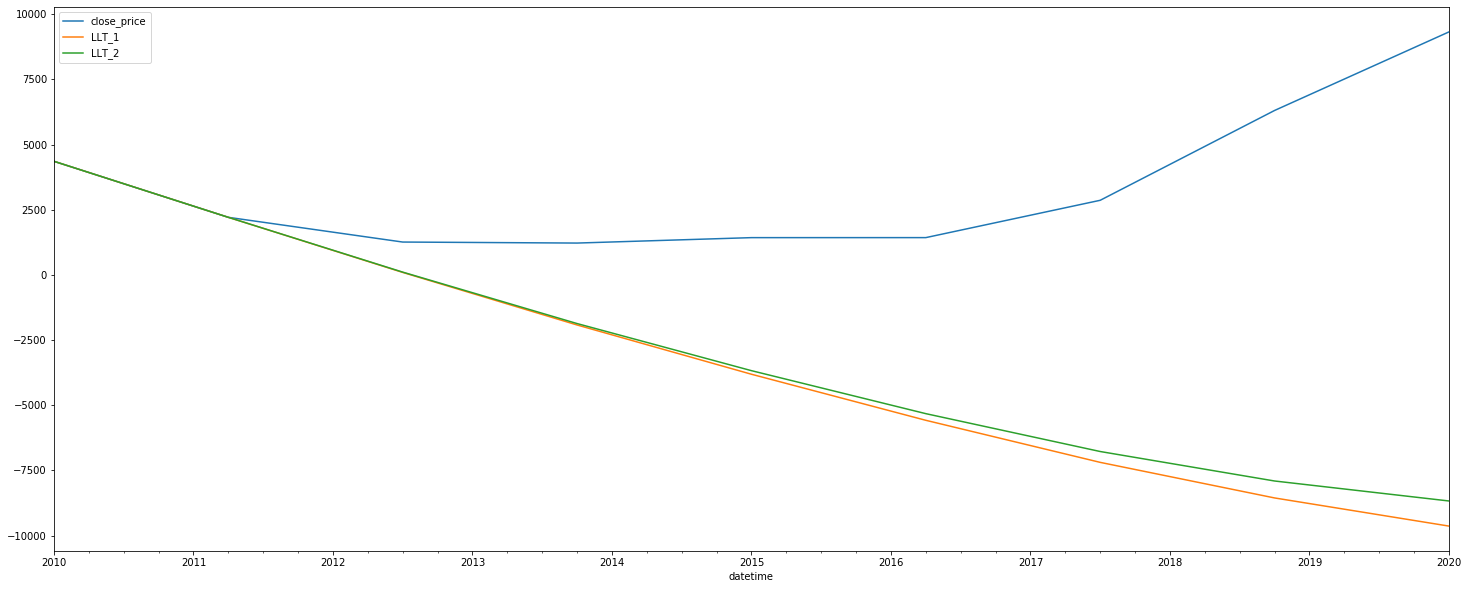

In [41]:
combine_df[['close_price','LLT_1','LLT_2']].plot(figsize=(25,10))